# Теория вероятностей и математическая статистика.
## Домашнее задание 9

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

* Задание 1   
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

b1 = 2.6205388824027653
b2 = 2.620538882402765
b0 = 444.17735732435955

y_pred = [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]

Коээфициент корреляции = 0.8874900920739162
Коэффициент детерминации = 0.7876386635293682



<function matplotlib.pyplot.show(*args, **kw)>

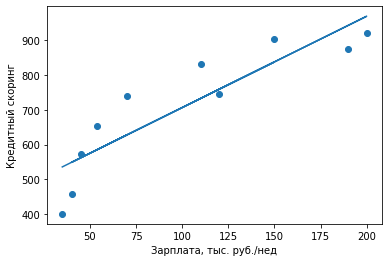

In [3]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)
n = len(x)

b1 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
b2 = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
print(f'b1 = {b1}')
print(f'b2 = {b2}')

b0 = np.mean(y) - b1 * np.mean(x)
print(f'b0 = {b0}')
print()

y_pred = b0 + b1 * x
print(f'y_pred = {y_pred}')
print()

Pirson = np.corrcoef(x, y)[0, 1]
print(f'Коээфициент корреляции = {Pirson}')

determ = Pirson**2
print(f'Коэффициент детерминации = {determ}')
print()

plt.scatter(x, y)
plt.xlabel("Зарплата, тыс. руб./нед")
plt.ylabel("Кредитный скоринг")
plt.plot(x,y_pred)
plt.show

Coefficient of determination = 0.7876386635293685
Intercept = [444.17735732]
Slope = [[2.62053888]]

y_pred = [[535.89621821]
 [562.10160703]
 [942.07974498]
 [968.2851338 ]
 [548.99891262]
 [627.61507909]
 [585.68645697]
 [837.25818968]
 [758.64202321]
 [732.43663439]]


<function matplotlib.pyplot.show(*args, **kw)>

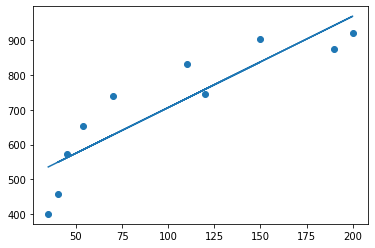

In [4]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp).reshape(len(x), 1)
y = np.array(ks).reshape(len(x), 1)

lr = LinearRegression()

lr.fit(x, y)
coef_det = lr.score(x,y)
print(f'Coefficient of determination = {coef_det}')
print(f'Intercept = {lr.intercept_}')
print(f'Slope = {lr.coef_}')

print()
y_pred = lr.predict(x)
print(f'y_pred = {y_pred}')
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show

remains = [[-134.89621821]
 [  11.89839297]
 [ -68.07974498]
 [ -49.2851338 ]
 [ -89.99891262]
 [ 111.38492091]
 [  67.31354303]
 [  64.74181032]
 [ -12.64202321]
 [  99.56336561]]
rem_mean = 1.1368683772161604e-14



ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

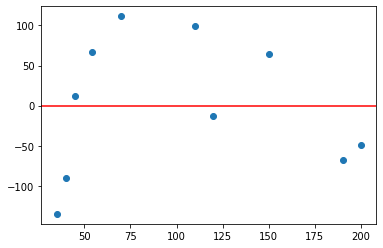

In [5]:
remains = y - y_pred
print(f'remains = {remains}')
rem_mean = np.mean(remains)
print(f'rem_mean = {rem_mean}')

plt.scatter(x, remains)
plt.axhline(rem_mean, color = 'r', linestyle = '-')
plt.show
print()
stats.shapiro(remains)

In [7]:
alfa = 0.05
p = 2
n = len(x)
conf_int = 1 - alfa
df1 = p - 1
df2 = n - p
tabular_F = stats.f.ppf(conf_int, df1, df2)

SSf = np.sum((y_pred - np.mean(y))**2)
SSo = np.sum((y - y_pred)**2)
print(f'SSf = {SSf}, SSo = {SSo}')

MSf = SSf/df1
MSo = SSo/df2
print(f'MSf = {MSf}, MSo = {MSo}')

F = MSf/MSo

print(f'y = {y}')
print(f'mean(y) = {np.mean(y)}')
print(f'y_pred = {y_pred}')

print(f'Табличное значение критерия Фишера = {tabular_F}')
print(f'Рассчитанное значение критерия Фишера = {F}')
print('Рассчитанное значение критерия Фишера больше табличного, следовательно, наши расчеты статистически значимы')

SSf = 239984.7579882336, SSo = 64704.1420117666
MSf = 239984.7579882336, MSo = 8088.017751470825
y = [[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]
mean(y) = 709.9
y_pred = [[535.89621821]
 [562.10160703]
 [942.07974498]
 [968.2851338 ]
 [548.99891262]
 [627.61507909]
 [585.68645697]
 [837.25818968]
 [758.64202321]
 [732.43663439]]
Табличное значение критерия Фишера = 5.317655071578714
Рассчитанное значение критерия Фишера = 29.67164085966451
Рассчитанное значение критерия Фишера больше табличного, следовательно, наши расчеты статистически значимы


In [27]:
R1 = np.corrcoef(x, y)[1,0]**2
T1 = (R1/(1-R1))*(df2/df1)
print(f'T1 = {T1}')

T1 = 29.671640859664432


* Задание 2   
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [23]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)
n = len(x)
B1 = 0.1
alpha = 1e-6

def mse_(B1, y=y, x=x, n=n):
  return np.sum((B1*x - y)**2)/n
print(f'mse = {mse_(B1)}')

mse = 518336.326


In [34]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)
n = len(x)
B1 = 0.1
alpha = 1e-6

mse1 = 1/n * np.sum((B1*x - y) * x)
mse2 = (2/n) * np.sum((B1 * x - y)**2)
print(f'mse1 = {mse1}')
print(f'mse2 = {mse2}')
# Эти обе формулы давали на лекции, но какая-то, явно неправильная
print()

for i in range(3001):
  B1 -= alpha * (2/n) * np.sum((B1*x-y)*x)
  if i % 500 == 0:
    print(f'Iteration = {i}     B1 = {B1}     mse = {mse_(B1)}')

mse1 = -79764.04000000001
mse2 = 1036672.652

Iteration = 0     B1 = 0.25952808     mse = 493237.7212546963
Iteration = 500     B1 = 5.889815595583751     mse = 56516.858416040064
Iteration = 1000     B1 = 5.8898204201285544     mse = 56516.85841571941
Iteration = 1500     B1 = 5.889820420132673     mse = 56516.85841571943
Iteration = 2000     B1 = 5.889820420132673     mse = 56516.85841571943
Iteration = 2500     B1 = 5.889820420132673     mse = 56516.85841571943
Iteration = 3000     B1 = 5.889820420132673     mse = 56516.85841571943


In [36]:
mse_(5.889820420132673)

56516.85841571943

* Задание 3   
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [ ]:
# к сожалению, я не понял как делать это задание